# Visualisation python package code snippets

- This notebook is to contain visualisation python package code snippets

## Matplotlib / Seaborn

#### Size encoded heatmap

,A,B,C,D,E,F,G,H,I,J,K
0,1.0,0.5,0.8,0.5,0.3,-0.7,-0.5,-0.5,-0.2,-0.1,0.3
1,0.5,1.0,0.7,0.8,0.8,-0.2,-0.5,-0.9,-0.8,-0.8,-0.6
2,0.8,0.7,1.0,0.8,0.7,-0.6,-0.7,-0.9,-0.3,-0.2,-0.1
3,0.5,0.8,0.8,1.0,0.8,-0.6,-0.9,-0.9,-0.8,-0.4,-0.3
4,0.3,0.8,0.7,0.8,1.0,-0.4,-0.8,-0.9,-0.8,-0.6,-0.5
5,-0.7,-0.2,-0.6,-0.6,-0.4,1.0,0.8,0.5,0.1,-0.3,-0.2
6,-0.5,-0.5,-0.7,-0.9,-0.8,0.8,1.0,0.7,0.5,0.2,0.2
7,-0.5,-0.9,-0.9,-0.9,-0.9,0.5,0.7,1.0,0.8,0.7,0.6
8,-0.2,-0.8,-0.3,-0.8,-0.8,0.1,0.5,0.8,1.0,0.7,0.7
9,-0.1,-0.8,-0.2,-0.4,-0.6,-0.3,0.2,0.7,0.7,1.0,0.8


<ipython-input-2-d480874efd2f>:82: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(c_scale, ax=ax)


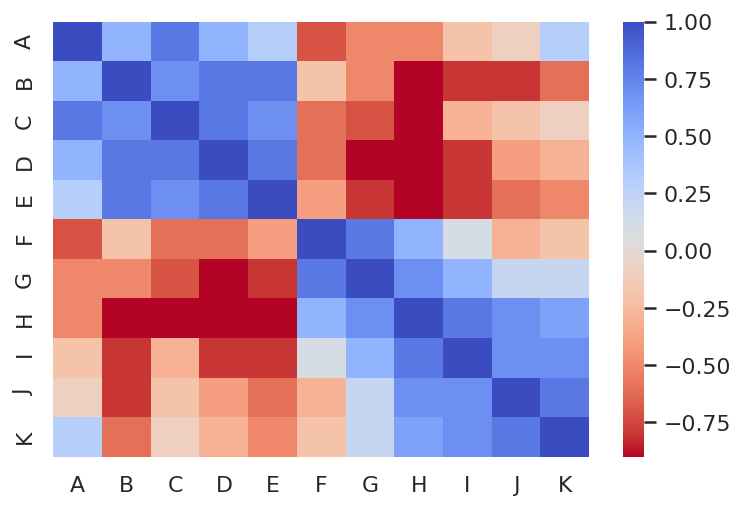

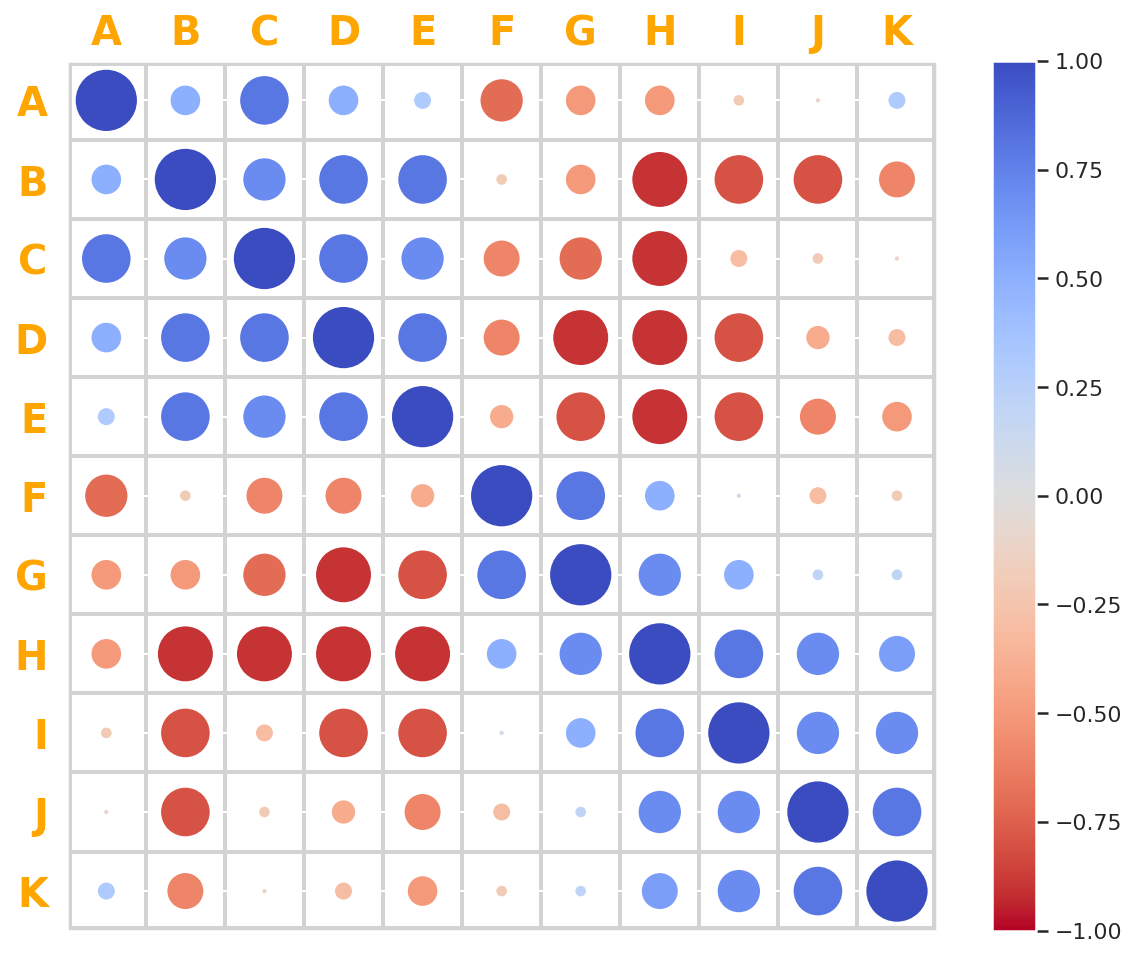

<ipython-input-2-d480874efd2f>:129: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(c_scale, ax=ax)


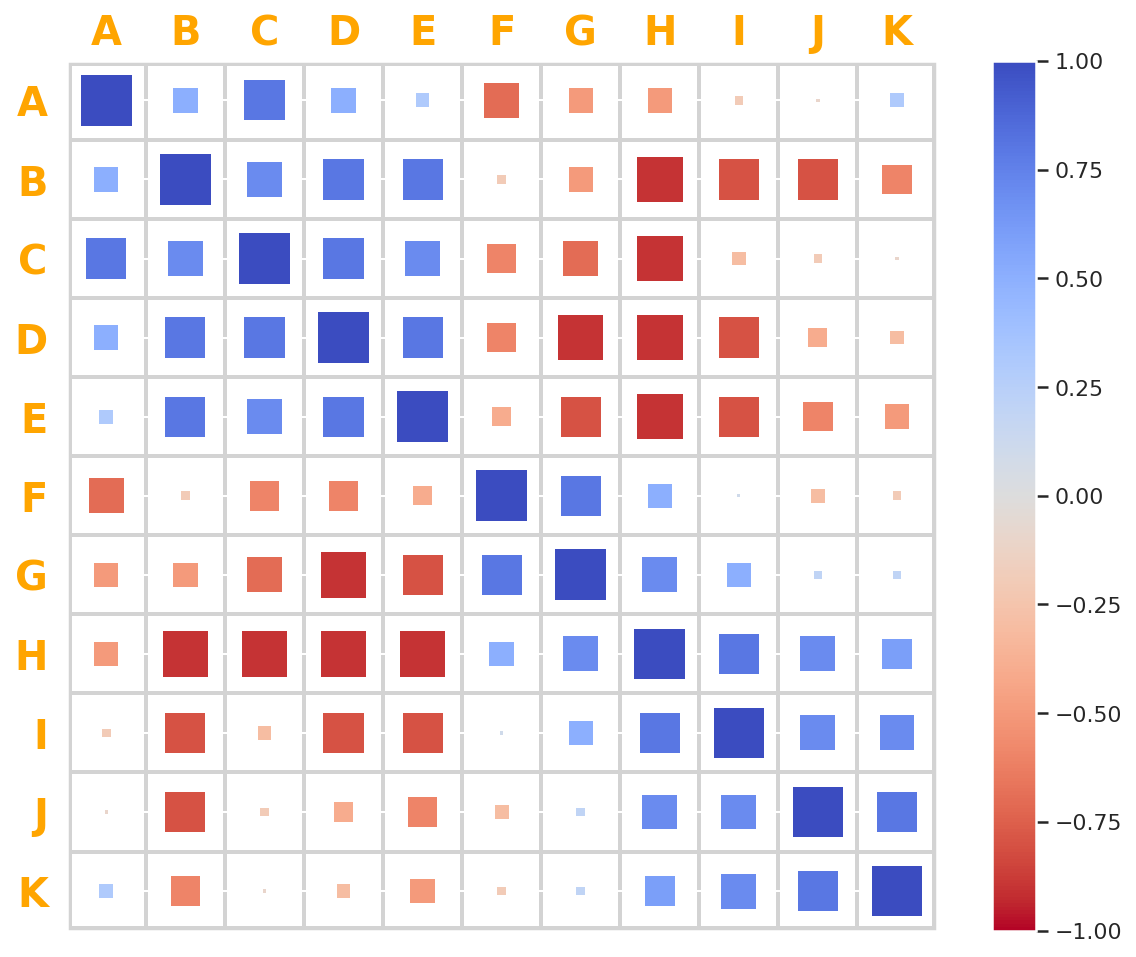

<ipython-input-2-d480874efd2f>:177: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(c_scale, ax=ax)


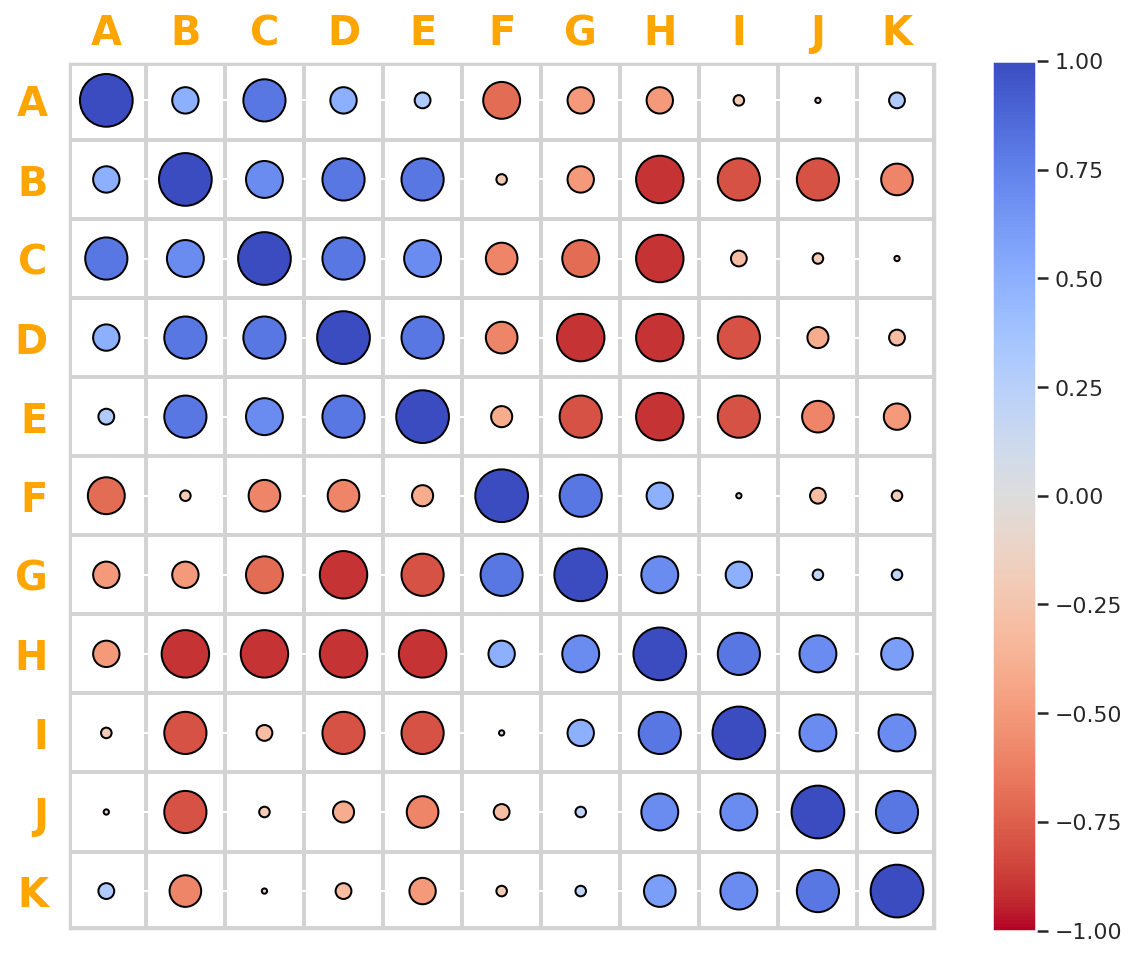

In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Ellipse, RegularPolygon
import matplotlib.colors as mcolors
import string

import seaborn as sns
sns.set()

plt.rcParams['font.family'] = ['Times New Roman', 'sans-serif']
plt.rcParams['figure.dpi'] = 144

# create some dummy data
values = np.array([[ 1. ,  0.5,  0.8,  0.5,  0.3, -0.7, -0.5, -0.5, -0.2, -0.1,  0.3],
                   [ 0.5,  1. ,  0.7,  0.8,  0.8, -0.2, -0.5, -0.9, -0.8, -0.8, -0.6],
                   [ 0.8,  0.7,  1. ,  0.8,  0.7, -0.6, -0.7, -0.9, -0.3, -0.2, -0.1],
                   [ 0.5,  0.8,  0.8,  1. ,  0.8, -0.6, -0.9, -0.9, -0.8, -0.4, -0.3],
                   [ 0.3,  0.8,  0.7,  0.8,  1. , -0.4, -0.8, -0.9, -0.8, -0.6, -0.5],
                   [-0.7, -0.2, -0.6, -0.6, -0.4,  1. ,  0.8,  0.5,  0.1, -0.3, -0.2],
                   [-0.5, -0.5, -0.7, -0.9, -0.8,  0.8,  1. ,  0.7,  0.5,  0.2,  0.2],
                   [-0.5, -0.9, -0.9, -0.9, -0.9,  0.5,  0.7,  1. ,  0.8,  0.7,  0.6],
                   [-0.2, -0.8, -0.3, -0.8, -0.8,  0.1,  0.5,  0.8,  1. ,  0.7,  0.7],
                   [-0.1, -0.8, -0.2, -0.4, -0.6, -0.3,  0.2,  0.7,  0.7,  1. ,  0.8],
                   [ 0.3, -0.6, -0.1, -0.3, -0.5, -0.2,  0.2,  0.6,  0.7,  0.8,  1. ]])

## make the data symmetric
values = (values + values.T - np.diag(np.diag(values)))/2
np.fill_diagonal(values, 1)

corr_matrix = pd.DataFrame(values, columns = list(string.ascii_uppercase[:values.shape[1]]))
display(corr_matrix)

# Make a default heatmap
corr_matrix_new = corr_matrix.set_index(corr_matrix.columns)
sns.heatmap(corr_matrix_new, cmap='coolwarm_r');

#####################################################################################

# 1. Circle size encoded

# create a white grid with the same dimensions as the correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
ax.set_facecolor('white')
ax.imshow(np.ones_like(corr_matrix), cmap='gray_r', interpolation='nearest')

# set the tick labels and rotation for the x and y axes
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

# shift ticks of x axis to top of the graph
ax.tick_params(axis='x', which='both', labelbottom=False, labeltop=True, bottom=False, top=True, length=0)

# format ticks
ax.set_yticklabels(corr_matrix.columns, fontsize=20, color = "orange", fontweight = "bold")
ax.set_xticklabels(corr_matrix.columns, fontsize=20, color = "orange", fontweight = "bold")


# create grid lines between the tick labels
ax.set_xticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True, linestyle="solid")
ax.set_yticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True,  linestyle="solid")
ax.grid(which="minor", color="lightgray", linestyle="solid", linewidth=2, )

# add rectangle around the grid
rect = plt.Rectangle((-.5, -.5), len(corr_matrix.columns), len(corr_matrix.columns), linewidth=5, edgecolor='lightgray', facecolor='none')
ax.add_patch(rect)

# create circles with radius proportional to the absolute value of correlation
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        correlation = corr_matrix.iat[i, j]
        norm = plt.Normalize(-1, 1)  # specify the range of values for the colormap
        sm = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
        color = sm.to_rgba(correlation)
        circle = Circle((i, j), radius=abs(correlation)/2.5, facecolor=color)
        ax.add_patch(circle)

# add color bar
norm = mcolors.Normalize(vmin=-1, vmax=1)
c_scale = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
cbar = plt.colorbar(c_scale, ax=ax)
plt.show()

#####################################################################################

# 2. Square size encoded

# create a white grid with the same dimensions as the correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
ax.set_facecolor('white')
ax.imshow(np.ones_like(corr_matrix), cmap='gray_r', interpolation='nearest')

# set the tick labels and rotation for the x and y axes
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

# shift ticks of x axis to top of the graph
ax.tick_params(axis='x', which='both', labelbottom=False, labeltop=True, bottom=False, top=True, length=0)

# format ticks
ax.set_yticklabels(corr_matrix.columns, fontsize=20, color = "orange", fontweight = "bold")
ax.set_xticklabels(corr_matrix.columns, fontsize=20, color = "orange", fontweight = "bold")


# create grid lines between the tick labels
ax.set_xticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True, linestyle="solid")
ax.set_yticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True,  linestyle="solid")
ax.grid(which="minor", color="lightgray", linestyle="solid", linewidth=2, )

# add rectangle around the grid
rect = plt.Rectangle((-.5, -.5), len(corr_matrix.columns), len(corr_matrix.columns), linewidth=5, edgecolor='lightgray', facecolor='none')
ax.add_patch(rect)

# create squares with radius proportional to the absolute value of correlation
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        correlation = corr_matrix.iat[i, j]
        norm = plt.Normalize(-1, 1)  # specify the range of values for the colormap
        sm = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
        color = sm.to_rgba(correlation)
        size = abs(correlation)/1.5
        rect = Rectangle(xy=(i-size/2, j-size/2), width=size, height=size, facecolor=color)
        ax.add_patch(rect)

# add color bar
norm = mcolors.Normalize(vmin=-1, vmax=1)
c_scale = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
cbar = plt.colorbar(c_scale, ax=ax)
plt.show()

#####################################################################################

# 3. Elipse size encoded


# create a white grid with the same dimensions as the correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
ax.set_facecolor('white')
ax.imshow(np.ones_like(corr_matrix), cmap='gray_r', interpolation='nearest')

# set the tick labels and rotation for the x and y axes
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

# shift ticks of x axis to top of the graph
ax.tick_params(axis='x', which='both', labelbottom=False, labeltop=True, bottom=False, top=True, length=0)

# format ticks
ax.set_yticklabels(corr_matrix.columns, fontsize=20, color = "orange", fontweight = "bold")
ax.set_xticklabels(corr_matrix.columns, fontsize=20, color = "orange", fontweight = "bold")


# create grid lines between the tick labels
ax.set_xticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True, linestyle="solid")
ax.set_yticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True,  linestyle="solid")
ax.grid(which="minor", color="lightgray", linestyle="solid", linewidth=2, )

# add rectangle around the grid
rect = plt.Rectangle((-.5, -.5), len(corr_matrix.columns), len(corr_matrix.columns), linewidth=5, edgecolor='lightgray', facecolor='none')
ax.add_patch(rect)

# create squares with radius proportional to the absolute value of correlation
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        correlation = corr_matrix.iat[i, j]
        norm = plt.Normalize(-1, 1)  # specify the range of values for the colormap
        sm = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
        color = sm.to_rgba(correlation)
        size = abs(correlation)/1.5
        ellipse = Ellipse((i, j), width=size, height=size, facecolor=color, edgecolor='black')
        ax.add_patch(ellipse)

# add color bar
norm = mcolors.Normalize(vmin=-1, vmax=1)
c_scale = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
cbar = plt.colorbar(c_scale, ax=ax)
plt.show()


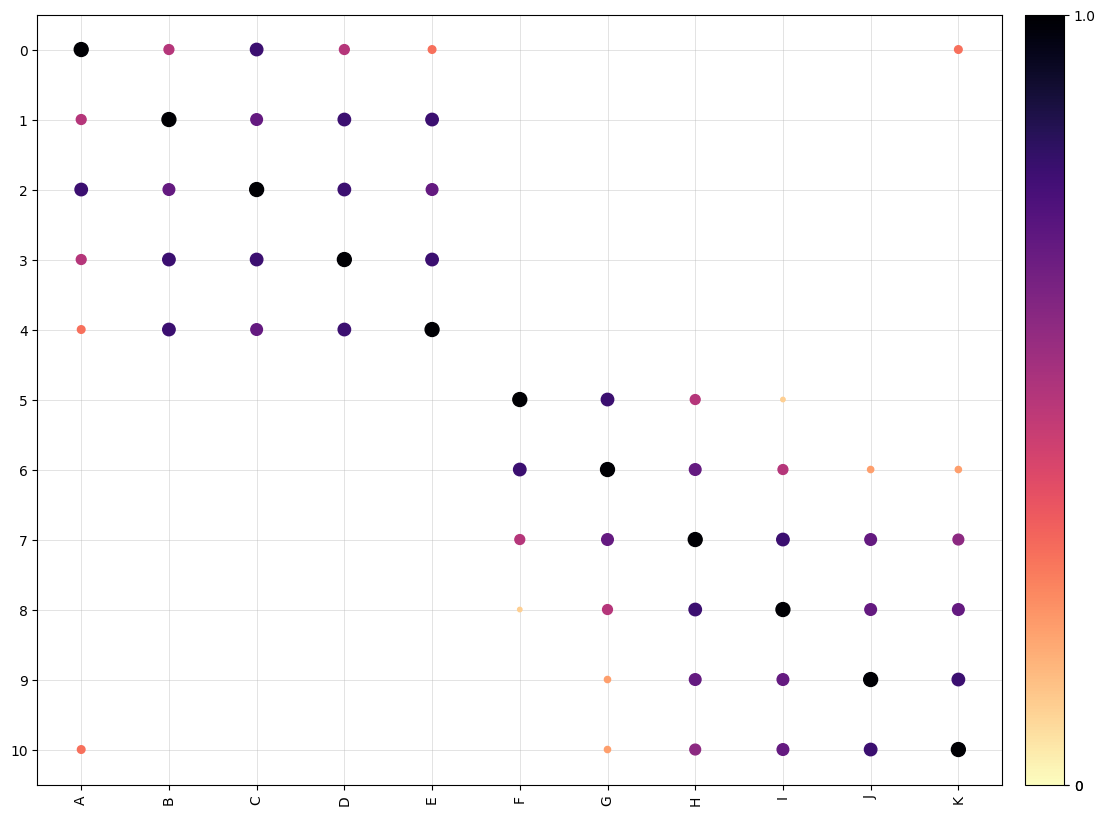

In [9]:
# If you only care about positive values e.g. from a classifier probability output

from matplotlib.ticker import MultipleLocator

# Reset matplotlib settings to default
plt.rcdefaults()

# Assuming corr_matrix is your correlation matrix from code_snippet 1
X, Y = np.meshgrid(range(len(corr_matrix.columns)), range(len(corr_matrix.index)))
crs_tbl = corr_matrix.values.flatten()

# manually set this dummy data values below 0 to 0 for example visualisation
crs_tbl[crs_tbl < 0] = 0


fig, ax = plt.subplots(figsize=(15, 10))
cmap = sns.color_palette("magma_r", as_cmap=True)
points = ax.scatter(X.flatten(), Y.flatten(), s=crs_tbl*100, c=crs_tbl, cmap=cmap, zorder=2)
#fig.colorbar(points)

# If you manually want to set the color bar range
vmin = 0  # adjust as needed
vmax = 1.0   # adjust as needed

colorbar = fig.colorbar(points, ax=ax, pad=0.02)  # Adjust pad as needed
colorbar.set_ticks([vmin, 0, vmax])  # Set tick positions manually
colorbar.set_ticklabels([f'{vmin:.1f}', '0', f'{vmax:.1f}'])  # Set tick labels manually



ax.invert_yaxis()
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.index)
plt.xticks(rotation=90)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, zorder=1)  # Specify zorder for gridlines
plt.show()

## Plotly

## Plotly-dash

## Bokeh